In [4]:
import pandas
import configparser
import psycopg2

In [5]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [6]:
conn = psycopg2.connect(host=host,
                       user=user,
                       password=pwd,
                       dbname=db)

In [7]:
sql = "select * from student"

In [8]:
df = pandas.read_sql_query(sql,conn)
df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT


In [11]:
sql = "select * from student"

In [12]:
df = pandas.read_sql_query(sql,conn)
df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT


In [15]:
sql = """

 select professor.p_name,course.c_name
    from professor
    inner join course
    on professor.p_email = course.p_email

"""


In [16]:
df = pandas.read_sql_query(sql,conn)
df[:]

,p_name,c_name
0,p2,mongodb
1,p3,facebook
2,p3,postgresql
3,p3,twitter


In [30]:
sql = """

select c_number, count(s_email) as enroll_count
from enroll
group by c_number
order by enroll_count desc


"""

<AxesSubplot:xlabel='c_number'>

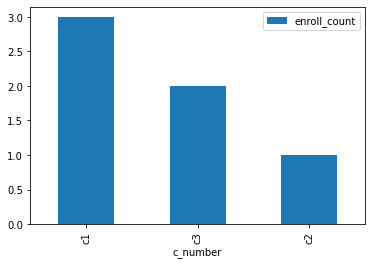

In [32]:
df = pandas.read_sql_query(sql,conn)
df.plot.bar(x='c_number',y='enroll_count')

In [33]:
sql = """

select professor.p_name, count(*) as num_course
from professor
inner join course
on professor.p_email = course.p_email
group by professor.p_name

"""

<AxesSubplot:xlabel='p_name'>

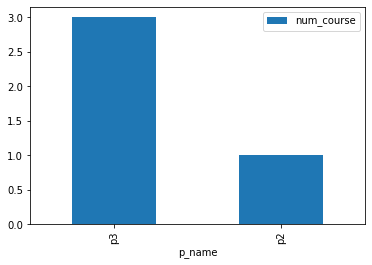

In [34]:
df = pandas.read_sql_query(sql,conn)
df.plot.bar(x='p_name',y='num_course')

In [35]:
sql = """

insert into student(s_email,s_name,major)
values('{}','{}','{}')

""".format('s5@jmu.edu','s5','GS')

print(sql)



insert into student(s_email,s_name,major)
values('s5@jmu.edu','s5','GS')




In [36]:
cur=conn.cursor()

In [37]:
cur.execute(sql)

In [38]:
conn.commit()

In [3]:
import pandas
import configparser
import psycopg2

In [4]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [5]:
conn = psycopg2.connect(host=host,
                       user=user,
                       password=pwd,
                       dbname=db)

In [8]:
sql = "select * from professor"

In [9]:
df = pandas.read_sql_query(sql,conn)
df[:]

,p_email,p_name,office
0,p2@jmu.edu,p2,o2
1,p3@jmu.edu,p3,o3


In [21]:
sql = """

insert into professor(p_email,p_name,office)
values('{}','{}','{}')

""".format('p4@jmu.edu','p4','o4')

print(sql)



insert into professor(p_email,p_name,office)
values('p4@jmu.edu','p4','o4')




In [22]:
cur=conn.cursor()

In [23]:
cur.execute(sql)

In [24]:
conn.commit()

In [25]:
sql = "select * from professor"

In [26]:
df = pandas.read_sql_query(sql,conn)
df[:]

,p_email,p_name,office
0,p2@jmu.edu,p2,o2
1,p3@jmu.edu,p3,o3
2,p4@jmu.edu,p4,o4


In [27]:
sql = "select * from course"

In [28]:
df = pandas.read_sql_query(sql,conn)
df[:]

,c_number,c_name,room,p_email
0,c2,mongodb,r2,p2@jmu.edu
1,c4,facebook,r1,p3@jmu.edu
2,c1,postgresql,r1,p3@jmu.edu
3,c3,twitter,r1,p3@jmu.edu


In [29]:
sql = """

insert into course(c_number,c_name,room,p_email)
values('{}','{}','{}','{}')

""".format('c5','linkedin','r2','p4@jmu.edu')

print(sql)



insert into course(c_number,c_name,room,p_email)
values('c5','linkedin','r2','p4@jmu.edu')




In [30]:
cur=conn.cursor()

In [31]:
cur.execute(sql)

In [32]:
conn.commit()

In [33]:
sql = "select * from course"

In [34]:
df = pandas.read_sql_query(sql,conn)
df[:]

,c_number,c_name,room,p_email
0,c2,mongodb,r2,p2@jmu.edu
1,c4,facebook,r1,p3@jmu.edu
2,c1,postgresql,r1,p3@jmu.edu
3,c3,twitter,r1,p3@jmu.edu
4,c5,linkedin,r2,p4@jmu.edu


In [42]:
sql = """

update course
set p_email = '{}'
where p_email = '{}'

""".format('p4@jmu.edu','p2@jmu.edu')

print(sql)



update course
set p_email = 'p4@jmu.edu'
where p_email = 'p2@jmu.edu'




In [43]:
cur=conn.cursor()

In [44]:
cur.execute(sql)

In [45]:
conn.rollback()

In [46]:
sql = """

update course
set p_email = '{}'
where p_email = '{}'

""".format('p4@jmu.edu','p2@jmu.edu')

print(sql)



update course
set p_email = 'p4@jmu.edu'
where p_email = 'p2@jmu.edu'




In [47]:
cur=conn.cursor()

In [48]:
cur.execute(sql)

In [49]:
conn.commit()

In [50]:
sql = "select * from course"

In [51]:
df = pandas.read_sql_query(sql,conn)
df[:]

,c_number,c_name,room,p_email
0,c4,facebook,r1,p3@jmu.edu
1,c1,postgresql,r1,p3@jmu.edu
2,c3,twitter,r1,p3@jmu.edu
3,c5,linkedin,r2,p4@jmu.edu
4,c2,mongodb,r2,p4@jmu.edu


In [52]:
sql = """

delete from professor
where p_email = '{}'

""".format('p2@jmu.edu')

In [53]:
cur=conn.cursor()

In [54]:
cur.execute(sql)

In [55]:
conn.commit()

In [56]:
sql = "select * from professor"

In [57]:
df = pandas.read_sql_query(sql,conn)
df[:]

,p_email,p_name,office
0,p3@jmu.edu,p3,o3
1,p4@jmu.edu,p4,o4
